# Module D: Harmonic Oscillator in Finite Basis

## The Quantum Harmonic Oscillator

### Ladder Operators

Instead of working with position $\hat{x}$ and momentum $\hat{p}$ directly, we use:

- **Annihilation** (lowering): $\hat{a} = \frac{1}{\sqrt{2}}(\hat{X} + i\hat{P})$
- **Creation** (raising): $\hat{a}^\dagger = \frac{1}{\sqrt{2}}(\hat{X} - i\hat{P})$

### Key Properties

$$\hat{a}|n\rangle = \sqrt{n}|n-1\rangle$$
$$\hat{a}^\dagger|n\rangle = \sqrt{n+1}|n+1\rangle$$

### Number Operator

$$\hat{N} = \hat{a}^\dagger\hat{a}$$

with $\hat{N}|n\rangle = n|n\rangle$ (counts quanta of energy)

### Commutation Relation

$$[\hat{a}, \hat{a}^\dagger] = 1$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'

## Building Ladder Operators

### Matrix Elements

In the Fock basis $\{|0\rangle, |1\rangle, ..., |N-1\rangle\}$:

$$a_{mn} = \langle m|\hat{a}|n\rangle = \sqrt{n}\,\delta_{m,n-1}$$

This gives a matrix with $\sqrt{n}$ on the super-diagonal.

In [2]:
def create_annihilation_operator(N):
    """
    Build the annihilation operator â in N-dimensional Fock space.
    
    Matrix elements: ⟨m|â|n⟩ = √n δ_{m,n-1}
    
    Parameters:
    -----------
    N : int
        Dimension of truncated Fock space
        
    Returns:
    --------
    a : ndarray
        N×N annihilation operator matrix
    """
    # Super-diagonal elements: √1, √2, √3, ..., √(N-1)
    diagonal = np.sqrt(np.arange(1, N))
    
    # Place on the super-diagonal (k=1)
    a = np.diag(diagonal, k=1)
    
    return a.astype(complex)


def create_creation_operator(N):
    """
    Build the creation operator â† in N-dimensional Fock space.
    
    â† = (â)ᵀ (transpose, since â is real)
    Matrix elements: ⟨m|â†|n⟩ = √(n+1) δ_{m,n+1}
    """
    # Creation is the adjoint (conjugate transpose) of annihilation
    a = create_annihilation_operator(N)
    return np.conj(a.T)

In [3]:
# Create operators for N=6 dimensional space
N = 6

a = create_annihilation_operator(N)      # â
a_dag = create_creation_operator(N)      # â†

print("Annihilation operator â:")
print(np.round(np.real(a), 3))

print("\nCreation operator â†:")
print(np.round(np.real(a_dag), 3))

Annihilation operator â:
[[0.    1.    0.    0.    0.    0.   ]
 [0.    0.    1.414 0.    0.    0.   ]
 [0.    0.    0.    1.732 0.    0.   ]
 [0.    0.    0.    0.    2.    0.   ]
 [0.    0.    0.    0.    0.    2.236]
 [0.    0.    0.    0.    0.    0.   ]]

Creation operator â†:
[[0.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.    1.414 0.    0.    0.    0.   ]
 [0.    0.    1.732 0.    0.    0.   ]
 [0.    0.    0.    2.    0.    0.   ]
 [0.    0.    0.    0.    2.236 0.   ]]


## Derived Operators: N, x, p

### Number Operator
$$\hat{N} = \hat{a}^\dagger\hat{a}$$

### Position and Momentum (dimensionless units)
$$\hat{X} = \frac{1}{\sqrt{2}}(\hat{a} + \hat{a}^\dagger)$$
$$\hat{P} = \frac{i}{\sqrt{2}}(\hat{a}^\dagger - \hat{a})$$

In [4]:
# Number operator N = a†a
N_op = a_dag @ a

# Position operator (dimensionless)
X = (a + a_dag) / np.sqrt(2)

# Momentum operator (dimensionless)
P = 1j * (a_dag - a) / np.sqrt(2)

print("Number operator N̂ = â†â:")
print(np.round(np.real(N_op), 2))

print("\nEigenvalues of N̂:", np.round(np.linalg.eigvalsh(N_op), 2))

Number operator N̂ = â†â:
[[0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 5.]]

Eigenvalues of N̂: [0. 1. 2. 3. 4. 5.]


## Checking the Commutator

### Fundamental Relation

$$[\hat{a}, \hat{a}^\dagger] = \hat{a}\hat{a}^\dagger - \hat{a}^\dagger\hat{a} = \hat{I}$$

**Caveat**: In a truncated space, this only holds approximately!

The (N-1, N-1) element will be wrong because we cut off the Hilbert space.

In [5]:
def commutator(A, B):
    """Compute [A, B] = AB - BA"""
    return A @ B - B @ A

# Check [a, a†] = I
comm = commutator(a, a_dag)
I = np.eye(N)

print("[â, â†] = ")
print(np.round(np.real(comm), 3))

print(f"\nDifference from I (last element shows truncation error):")
print(np.round(np.real(comm - I), 3))

[â, â†] = 
[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0. -5.]]

Difference from I (last element shows truncation error):
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -6.]]


## Visualizing Operator Matrices

### Heatmaps Show Structure

- **â**: non-zero on super-diagonal (lowers n by 1)
- **â†**: non-zero on sub-diagonal (raises n by 1)
- **N̂**: diagonal (number eigenvalue)

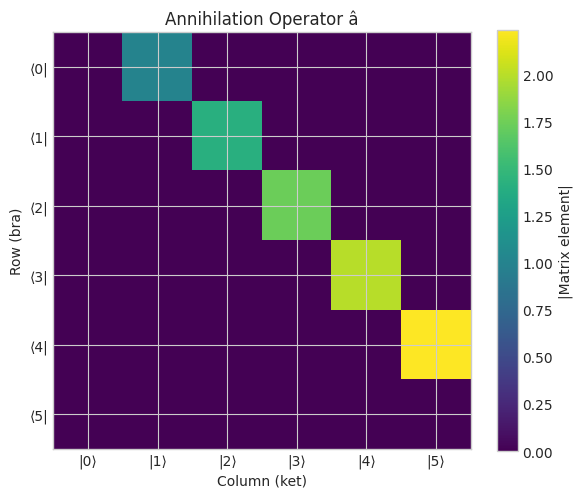

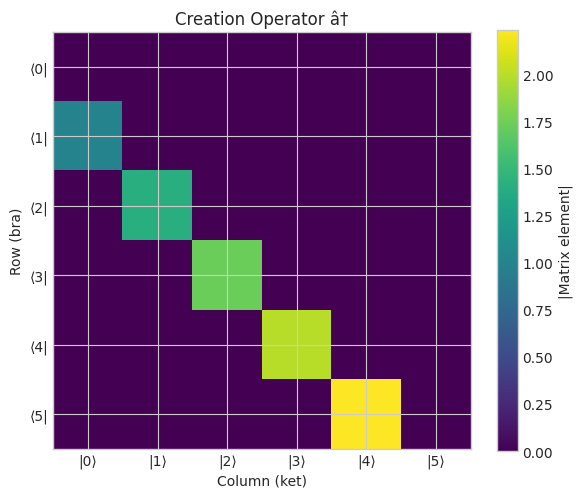

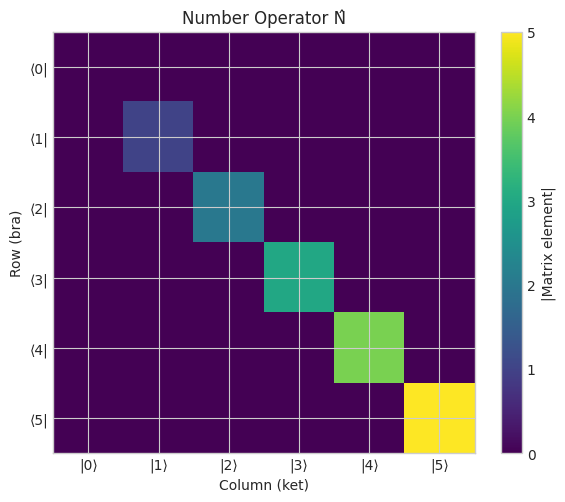

In [8]:
def plot_operator_heatmap(op, title):
    """Plot matrix elements as heatmap."""
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(np.abs(op), cmap='viridis')
    
    N = op.shape[0]
    ax.set_xticks(range(N))
    ax.set_yticks(range(N))
    ax.set_xticklabels([f'|{i}⟩' for i in range(N)])
    ax.set_yticklabels([f'⟨{i}|' for i in range(N)])
    ax.set_xlabel('Column (ket)')
    ax.set_ylabel('Row (bra)')
    ax.set_title(title)
    
    plt.colorbar(im, label='|Matrix element|')
    plt.tight_layout()
    plt.show()

plot_operator_heatmap(a, 'Annihilation Operator â')
plot_operator_heatmap(a_dag, 'Creation Operator â†')
plot_operator_heatmap(N_op, 'Number Operator N̂')

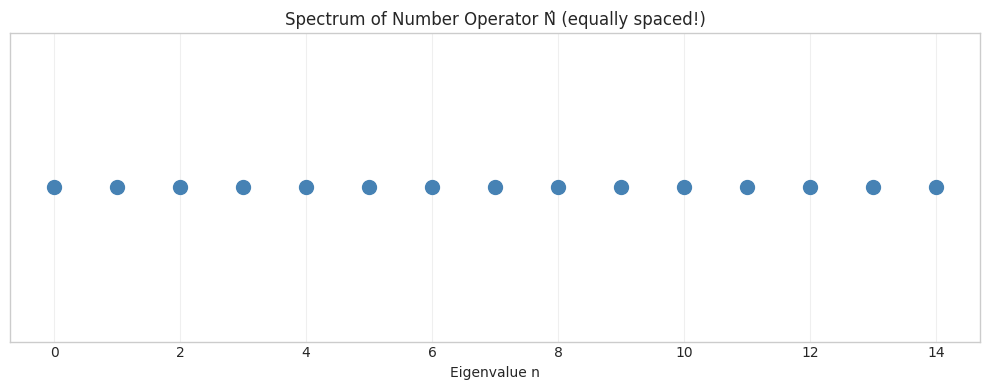

In [10]:
# Eigenvalue spectrum of N
N_large = 15
a_large = create_annihilation_operator(N_large)
a_dag_large = create_creation_operator(N_large)
N_op_large = a_dag_large @ a_large

eigenvalues = np.linalg.eigvalsh(N_op_large)

fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(eigenvalues, np.ones_like(eigenvalues), s=100, color='steelblue')
ax.set_xlabel('Eigenvalue n')
ax.set_title('Spectrum of Number Operator N̂ (equally spaced!)')
ax.set_yticks([])
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Animation: Climbing the Ladder

Starting from $|0\rangle$ (ground state), repeated application of $\hat{a}^\dagger$ creates:
$$|0\rangle \xrightarrow{\hat{a}^\dagger} |1\rangle \xrightarrow{\hat{a}^\dagger} \sqrt{2}|2\rangle \xrightarrow{\hat{a}^\dagger} \cdots$$

(We normalize at each step to see the probability distribution.)

In [11]:
def normalize(psi):
    norm = np.sqrt(np.vdot(psi, psi))
    if np.abs(norm) < 1e-10:
        return psi
    return psi / norm

In [12]:
# ============================================================
# ANIMATION: Climbing the ladder with a†
# ============================================================

N_anim = 8
a_anim = create_annihilation_operator(N_anim)
adag_anim = create_creation_operator(N_anim)

fig, ax = plt.subplots(figsize=(10, 5))

def init():
    ax.set_xlim(-0.5, N_anim - 0.5)
    ax.set_ylim(0, 1.2)
    return []

def animate(frame):
    ax.clear()
    
    # Start from |0⟩ and apply â† 'frame' times
    psi = np.zeros(N_anim, dtype=complex)
    psi[0] = 1
    
    for _ in range(frame):
        psi = adag_anim @ psi
        psi = normalize(psi)
    
    probs = np.abs(psi)**2
    
    x = np.arange(N_anim)
    bars = ax.bar(x, probs, color='steelblue', alpha=0.8, edgecolor='navy')
    
    ax.set_xticks(x)
    ax.set_xticklabels([f'|{i}⟩' for i in range(N_anim)])
    ax.set_ylabel('Probability')
    ax.set_ylim(0, 1.2)
    ax.set_title(f'After {frame} applications of â†')
    ax.grid(True, alpha=0.3)
    
    return []

anim = FuncAnimation(fig, animate, init_func=init, 
                     frames=N_anim, interval=600, blit=False)
plt.close()
HTML(anim.to_jshtml())

## Summary

### Ladder Operators in Finite Space

| Operator | Matrix Structure | Action |
|----------|------------------|--------|
| $\hat{a}$ | Super-diagonal | Lowers n by 1 |
| $\hat{a}^\dagger$ | Sub-diagonal | Raises n by 1 |
| $\hat{N}$ | Diagonal | Counts quanta |

### Truncation Effects

- Commutator $[a,a^\dagger] = I$ only approximate
- Error visible in the (N-1,N-1) element
- Use large N for better accuracy